# Gradient Boosted Tree Model

Gradient Boosted Tree is similar to random forest models, but the difference is that trees are built successively. With each iteration, the next tree fits the residual errors from the previous tree in order to improve the fit.

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plot

## Example 1:  Vacation dataset

In [2]:
# load data
df1 = pd.read_csv('vacation_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
1,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0
2,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0
3,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0
4,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0,-20.0


In [3]:
# Split data

vacat = df1.values
# split into lagged variables and original time series
X1= vacat[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = vacat[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [4]:
# Columns t-1 to t-12, which are the lagged variables
# X1

In [5]:
# Column t, which is the original time series
# y1[0:10]

In [6]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.75)   # Set split
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 174
Training Observations for Target: 130
Testing Observations for Target: 44


In [7]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.75)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 174
Training Observations for feature: 130
Testing Observations for feature: 44


In [8]:
# Gradient Boosted Regression Model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=2,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.977863685438799
0.7237380036296147


In [15]:

from sklearn.model_selection import ParameterGrid

grid = {'subsample':[0.6],'n_estimators': [100,200,250,300,500], 
        'learning_rate': [0.01,0.01, 0.1, 0.5],'max_features': [2,3,4,5,6],
            'random_state': [17]}

In [17]:
# Run grid search
# grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [17]}

test_scores = []
train_scores= []

#print(list(ParameterGrid(grid)))

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    
    gbr.set_params(**g)  # ** is "unpacking" the dictionary
    gbr.fit(train_feature, train_target)
    test_scores.append(gbr.score(test_feature, test_target))
    train_scores.append(gbr.score(train_feature, train_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)

#print(train_scores)
#print(test_scores)

print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  # You don't want negative value
print(train_scores[best_idx])

0.7930923716834288 {'subsample': 0.6, 'random_state': 17, 'n_estimators': 300, 'max_features': 6, 'learning_rate': 0.1}
0.999581785837155


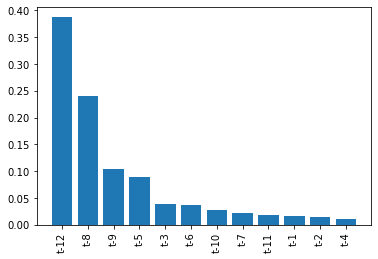

In [18]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x1 = range(X1.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x1, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

## Example 2: Furniture Dataset

In [8]:
# load data, this data has been stationarized
df2 = pd.read_csv('~/Desktop/section_4/furniture_lags_12months_features.csv', header=0)
df2.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.069088,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869
1,-0.002419,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474
2,0.033839,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723
3,0.022829,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674
4,0.013640,0.011722,-0.023777,0.042725,0.043720,0.127219,-0.219927,-0.044419,0.121869,0.003474,0.038723,0.008674,0.024956


In [9]:
# Split Data

furn = df2.values
# split into lagged variables (features) and original time series data (target)
X2= furn[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = furn[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [10]:
# Columns t-1 to t-12, which are the lagged variables
X2

array([[ 0.06908776, -0.00241871,  0.03383942, ...,  0.12721928,
        -0.21992713, -0.04441943],
       [-0.00241871,  0.03383942,  0.02282904, ..., -0.21992713,
        -0.04441943,  0.12186938],
       [ 0.03383942,  0.02282904,  0.01364014, ..., -0.04441943,
         0.12186938,  0.00347408],
       ...,
       [ 0.08460108, -0.01831672, -0.00127104, ..., -0.01906175,
         0.17492792, -0.04829062],
       [-0.01831672, -0.00127104,  0.04903607, ...,  0.17492792,
        -0.04829062,  0.08136081],
       [-0.00127104,  0.04903607, -0.06026621, ..., -0.04829062,
         0.08136081, -0.05698937]])

In [11]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2[0:10]

array([ 0.12186938,  0.00347408,  0.03872338,  0.00867379,  0.02495622,
        0.01369304, -0.02164084,  0.03759901,  0.08095082,  0.09170221])

Below, you can alter the splits as 50-50, 60-40, 70-30, 75-25, 80-20, and 85-15, etc. 

In [12]:
# Target Train-Test split
from pandas import read_csv

Y2 = y2
traintarget_size = int(len(Y2) * 0.75)   # Set split
train_target, test_target = Y2[0:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 317
Training Observations for Target: 237
Testing Observations for Target: 80


In [13]:
# Features Train-Test split

trainfeature_size = int(len(X2) * 0.75)
train_feature, test_feature = X2[0:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 317
Training Observations for feature: 237
Testing Observations for feature: 80


In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.9646015239785328
0.9023134137739652


The GB model is  better than Random Forest model.

We can extract feature importances from gradient boosting models to understand which features are the best predictors. Sometimes it's nice to try different tree-based models and look at the feature importances from all of them. This can help average out any peculiarities that may arise from one particular model.

The feature importances are stored as a numpy array in the .feature_importances_ property of the gradient boosting model. We'll need to get the sorted indices of the feature importances, using np.argsort(), in order to make a nice plot. We want the features from largest to smallest, so we will use Python's indexing to reverse the sorted importances like feat_importances[::-1].

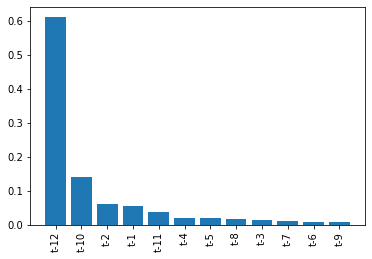

In [15]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

Notice the feature importances are not exactly the same as the random forest model's but they are close.

## Example 3: Bank of America Dataset

In [16]:
# load data, this data has been stationarized
df3 = pd.read_csv('~/Desktop/section_4/bac_lags_12months_features.csv', header=0)
df3.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1.687537,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093
1,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426
2,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101
3,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008
4,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008,1.707245


In [17]:
# Split Data

bac = df3.values
# split into lagged variables (features) and original time series data (target)
X3= bac[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y3 = bac[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [18]:
# Columns t-1 to t-12, which are the lagged variables
X3

array([[ 1.68753707,  1.46948457,  1.44104242, ...,  0.98710191,
         1.00266206,  1.23278129],
       [ 1.46948457,  1.44104242,  1.52588725, ...,  1.00266206,
         1.23278129,  1.28209293],
       [ 1.44104242,  1.52588725,  1.47666395, ...,  1.23278129,
         1.28209293,  1.59542644],
       ...,
       [30.09263229, 28.80098343, 26.88482857, ..., 26.28380585,
        28.81011391, 30.47911263],
       [28.80098343, 26.88482857, 27.76469421, ..., 28.81011391,
        30.47911263, 27.32987022],
       [26.88482857, 27.76469421, 24.22343063, ..., 30.47911263,
        27.32987022, 29.17000008]])

In [19]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y3[0:10]

array([1.28209293, 1.59542644, 1.69910097, 1.94100773, 1.70724475,
       1.65948939, 1.91634405, 1.76750135, 1.85432637, 1.70548344])

In [20]:
# Target Train-Test split
from pandas import read_csv

Y3 = y3
traintarget_size = int(len(Y3) * 0.75)   # Set split
train_target, test_target = Y3[0:traintarget_size], Y3[traintarget_size:len(Y3)]

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 258
Testing Observations for Target: 87


In [21]:
# Features Train-Test split

trainfeature_size = int(len(X3) * 0.75)
train_feature, test_feature = X3[0:trainfeature_size], X3[trainfeature_size:len(X3)]
print('Observations for feature: %d' % (len(X3)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 258
Testing Observations for feature: 87


In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters
gbr = GradientBoostingRegressor(max_features=8,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.99460446666043
0.9521949350955565


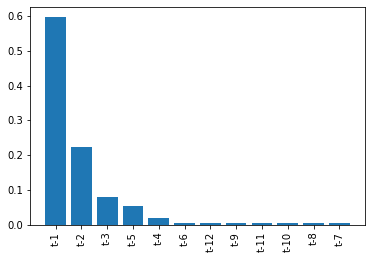

In [23]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x3 = range(X3.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x3, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

## Example 4:  J.P. Morgan Dataset

In [24]:
# load data
df4 = pd.read_csv('~/Desktop/section_4/jpm_lags_12months_features.csv', header=0)
df4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,3.083579,2.884144,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100
1,2.884144,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254
2,2.884144,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165
3,3.377686,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165,2.879019
4,3.223591,2.907553,2.733733,2.019471,1.319170,1.482032,1.427535,1.742920,2.191100,2.340254,2.761165,2.879019,2.909008


In [25]:
# split data

jpm = df4.values
# split into lagged variables and original time series
X4= jpm[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y4 = jpm[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [26]:
# Columns t-1 to t-12, which are the lagged variables
X4

array([[  3.0835793 ,   2.88414359,   2.88414359, ...,   1.4820317 ,
          1.42753482,   1.74292016],
       [  2.88414359,   2.88414359,   3.37768602, ...,   1.42753482,
          1.74292016,   2.19109988],
       [  2.88414359,   3.37768602,   3.22359133, ...,   1.74292016,
          2.19109988,   2.34025359],
       ...,
       [110.3382339 , 108.6626434 , 105.7192307 , ..., 104.3789597 ,
        110.1318283 , 115.0781479 ],
       [108.6626434 , 105.7192307 , 107.8235474 , ..., 110.1318283 ,
        115.0781479 , 108.9869385 ],
       [105.7192307 , 107.8235474 ,  94.66440582, ..., 115.0781479 ,
        108.9869385 , 116.754715  ]])

In [27]:
# Column t, which is the original time series
y4[0:10]

array([2.19109988, 2.34025359, 2.7611649 , 2.87901878, 2.90900755,
       3.48740601, 3.6064899 , 3.48626947, 3.40040255, 2.90236306])

In [28]:
# Target Train-Test split
from pandas import read_csv

Y4 = y4
traintarget_size = int(len(Y4) * 0.70)   # Set split
train_target, test_target = Y4[0:traintarget_size], Y4[traintarget_size:len(Y4)]

print('Observations for Target: %d' % (len(Y4)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 241
Testing Observations for Target: 104


In [29]:
# Features Train-Test split

trainfeature_size = int(len(X4) * 0.70)
train_feature, test_feature = X4[0:trainfeature_size], X4[trainfeature_size:len(X4)]
print('Observations for feature: %d' % (len(X4)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 241
Testing Observations for feature: 104


In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.9839877776490134
-1.1714873104202743


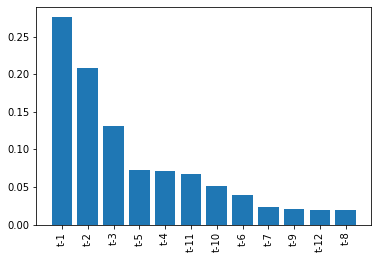

In [31]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x4 = range(X4.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x4, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

## Example 5: Average Temperature Dataset

In [32]:
# load data
df5 = pd.read_csv('~/Desktop/section_4/temp_lags_12months_features.csv', header=0)
df5.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,8.250412,17.050412,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412
1,17.050412,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412
2,23.950412,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412
3,24.850412,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412,19.250412
4,15.650412,6.550412,-10.549588,-21.549588,-18.749588,-23.749588,-9.749588,-4.349588,11.750412,19.150412,23.250412,19.250412,18.750412


In [33]:
temp = df5.values
# split into lagged variables and original time series
X5= temp[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y5 = temp[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [34]:
# Columns t-1 to t-12, which are the lagged variables
X5

array([[  8.25041237,  17.05041237,  23.95041237, ..., -23.74958763,
         -9.74958763,  -4.34958763],
       [ 17.05041237,  23.95041237,  24.85041237, ...,  -9.74958763,
         -4.34958763,  11.75041237],
       [ 23.95041237,  24.85041237,  15.65041237, ...,  -4.34958763,
         11.75041237,  19.15041237],
       ...,
       [ -8.34958763, -21.54958763, -26.64958763, ...,  23.25041237,
         18.35041237,   3.15041237],
       [-21.54958763, -26.64958763, -18.44958763, ...,  18.35041237,
          3.15041237, -17.54958763],
       [-26.64958763, -18.44958763, -13.34958763, ...,   3.15041237,
        -17.54958763, -17.44958763]])

In [35]:
# Column t, which is the original time series
y5[0:10]

array([ 11.75041237,  19.15041237,  23.25041237,  19.25041237,
        18.75041237,   3.75041237, -13.34958763, -20.74958763,
       -42.64958763, -24.44958763])

In [36]:
# Target Train-Test split
from pandas import read_csv

Y5 = y5
traintarget_size = int(len(Y5) * 0.80)   # Set split
train_target, test_target = Y5[0:traintarget_size], Y5[traintarget_size:len(Y5)]

print('Observations for Target: %d' % (len(Y5)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 957
Training Observations for Target: 765
Testing Observations for Target: 192


In [37]:
# Features Train-Test split

trainfeature_size = int(len(X5) * 0.80)
train_feature, test_feature = X5[0:trainfeature_size], X5[trainfeature_size:len(X5)]
print('Observations for feature: %d' % (len(X5)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 957
Training Observations for feature: 765
Testing Observations for feature: 192


In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor


# The fraction of samples to be used for fitting the individual base learners. 
# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=8,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.966727972479287
0.9382694989776716


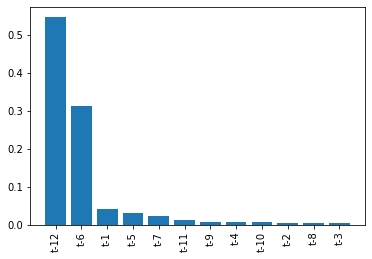

In [39]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x5 = range(X5.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plot.bar(x5, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plot.xticks(rotation=90)
plot.show()

## Summary

In summary, we looked at a Gradient Boosted model on a dataset that consisted of 12 lagged variables.  The dataset was split into features and target. It was further split according to a training and testing datasets.  In some ways, the feature importances of the Gradient Boosted model are similar to those of the feature importances of the Random Forest model.